**Introduction to Artificial Neural Networks with Keras**

This notebook is inspired from the handson-ml2 GitHub repository by Aurélien Geron

https://github.com/ageron/handson-ml2

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [2]:
# Python >= 3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Tensorflow >= 2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

# setting fixed seed
np.random.seed(42)

# Python line magic functions are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id, "in", IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
# Imports
from sklearn.datasets import load_iris # Contains the Iris dataset
from sklearn.linear_model import Perceptron

In [3]:
# Loading Iris dataset
iris = load_iris()
X = iris.data[:, (2, 3)] #only petal length ansd petal width
y = (iris.target == 0).astype(np.int) # predinting only setosa (target = 0)

In [4]:
# Creating and Training the perceptron
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # creating the model
per_clf.fit(X, y) # training the model

Perceptron(random_state=42)

In [5]:
# Predicting using the model
y_pred = per_clf.predict([[2, 0.5]])

In [6]:
y_pred

array([1])

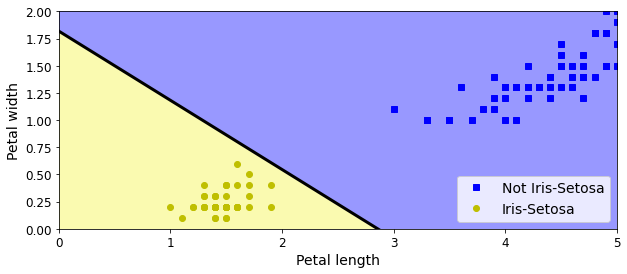

In [7]:
# Plotting predictions for Iris Setosa vs non Iris Setosa
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

# meshgrid function is used to create a rectangular grid out of two given
# one-dimensional arrays representing the Cartesian indexing or Matrix indexing

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# ravel returns contiguous flattened array
# (1D array with all the input-array elements and with the same type as it)

X_new = np.c_[x0.ravel(), x1.ravel()] # Translates slice objects to concatenation along the second axis.
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# Activation functions

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

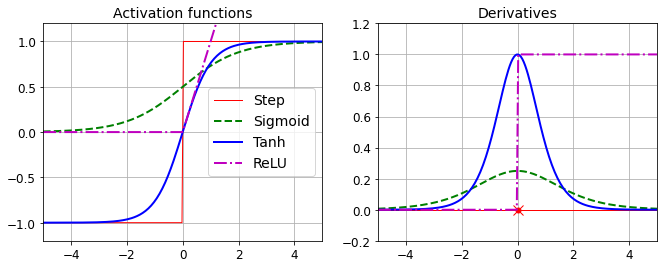

In [9]:
# plotting the Activation functions and their derivatives

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

# first plot

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# second plot

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [10]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    a = activation(x1 + x2 - 1.5)
    b = activation(x1 + x2 - 0.5)
    return activation(-a + b - 0.5)

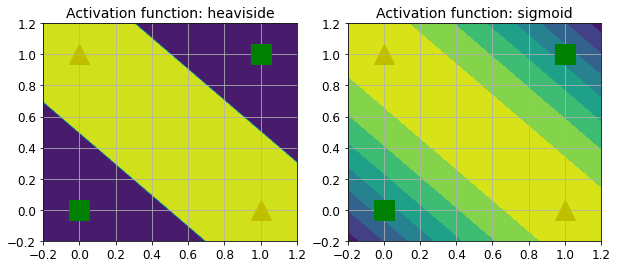

In [11]:
# plotting the Heaviside and Sigmoid function

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

# first plot

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

# second plot

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [12]:
import numpy as np
a = np.exp([0.4, 0.3])
a/np.sum(a)

array([0.52497919, 0.47502081])

# Building an Image Classifier

In [4]:
import tensorflow as tf
from tensorflow import keras

In [14]:
tf.__version__

'2.0.0'

In [15]:
keras.__version__

'2.2.4-tf'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:


For more infor: https://github.com/zalandoresearch/fashion-mnist

In [20]:
fashion_mnist = keras.datasets.fashion_mnist # loading the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() # sorting into test and train set

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [17]:
X_train_full.shape # checking the shape of the training set

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [18]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [21]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [22]:
X_test =  X_test/255

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

In [21]:
y_train[0]

4

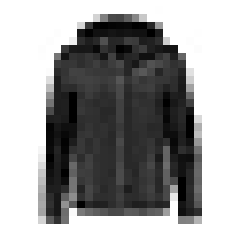

In [22]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [23]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [26]:
X_valid.shape

(5000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

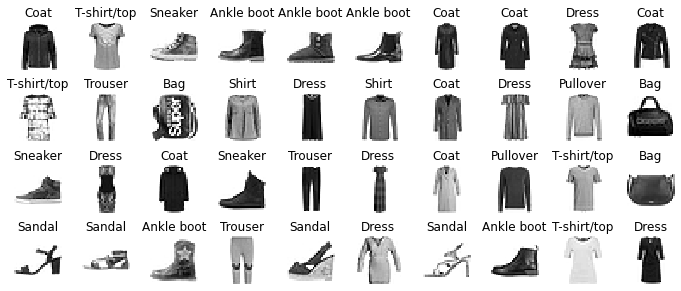

In [28]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [29]:
# Creating a classification MLP with Keras' Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # flatten layer
model.add(keras.layers.Dense(300, activation="relu")) # dense layer 1
model.add(keras.layers.Dense(100, activation="relu")) # dense layer 2
model.add(keras.layers.Dense(10, activation="softmax")) # softmax layer

In [30]:
# definition of softmax
# Softmax converts a real vector to a vector of categorical probabilities.
# The elements of the output vector are in range (0, 1) and sum to 1.
def softmax(arr):
    pos = np.exp(arr)
    return pos/sum(pos)

In [31]:
softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

In [32]:
softmax([1,2,3,4])

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [33]:
sum([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

1.0

**Why do we need clear_session?**

It is useful when you're creating multiple models in succession, such as during hyperparameter search or cross-validation. Each model you train adds nodes (potentially numbering in the thousands) to the graph. EVentually models will become slower and slower to train, and you may also run out of memory. Clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown.

In [34]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [35]:
# better way
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.layers

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
(784+1)*300 + (300+1)*100 + (100+1)*10

266610

In [200]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

# if you get:
# Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
# I tried to install the two packages in tf env but it did not work.

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [42]:
hidden1 = model.layers[1] # first layer
hidden1.name

'dense'

In [43]:
model.get_layer(hidden1.name) is hidden1 # checking if the layer is hidden

True

In [44]:
weights, biases = hidden1.get_weights() # getting the weights and biases

In [45]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [46]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
weights.shape

(784, 300)

In [50]:
biases.shape

(300,)

In [52]:
# when we need to transform to categorical
res = tf.keras.utils.to_categorical([1, 2, 0, 4])

In [53]:
res

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [55]:
# viceversa
np.argmax(res, axis=1)

array([1, 2, 0, 4])

In [80]:
# using as optimizer the Stochastic Gradient Descent
sgd = keras.optimizers.SGD(learning_rate=0.01)

# Compiling the model we created
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

In [82]:
# Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as 
# integers. If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss. 
# There should be # classes floating point values per feature for y_pred and a single floating point value per feature
# for y_true.
# In the snippet below, there is a single floating point value per example for y_true and # classes floating pointing
# values per example for y_pred. The shape of y_true is [batch_size] and the shape of y_pred is [batch_size, num_clas ses].
y_true = tf.convert_to_tensor([1, 2])
y_pred = tf.convert_to_tensor([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
# Using 'auto'/'sum_over_batch_size' reduction type.  
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()

1.1769392

This is equivalent to:
```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [81]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.7228 - accuracy: 0.7622 - val_loss: 0.5310 - val_accuracy: 0.8148
Epoch 2/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4838 - accuracy: 0.8323 - val_loss: 0.4496 - val_accuracy: 0.8450
Epoch 3/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4379 - accuracy: 0.8473 - val_loss: 0.4178 - val_accuracy: 0.8556
Epoch 4/30
55000/55000 [==============================] - 7s 131us/sample - loss: 0.4127 - accuracy: 0.8556 - val_loss: 0.3899 - val_accuracy: 0.8654
Epoch 5/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3929 - accuracy: 0.8625 - val_loss: 0.3971 - val_accuracy: 0.8614
Epoch 6/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.3776 - accuracy: 0.8675 - val_loss: 0.3720 - val_accuracy: 0.8740
Epoch 7/30
55000/55000 [===========================

In [83]:
history.params # getting the param history

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [85]:
print(history.epoch) # epoch history

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [87]:
history.history.keys() # printing the history keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

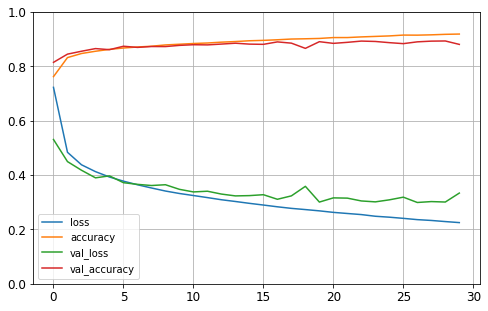

In [91]:
# Plotting the mean training loss and accuracy measured over each epoch
# and the mean validation loss and accuracy measured at the end of each epoch

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [95]:
model.evaluate(X_test, y_test) # Evaluating the model

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3698365963816643, 0.8657]

In [96]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [122]:
# predicting first 10 elements:
X_new = X_test[:10]
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

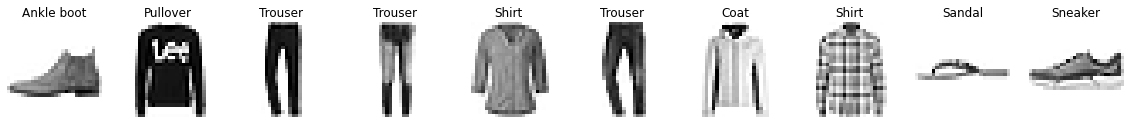

In [128]:
# Plotting the predicted elements

plt.figure(figsize=(20, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing() # loading the California Housing dataset

# test size default = 0.25 of full
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) # test and train
# validation size 0.25 of train
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) # training and validation

# Using the StandardScaler to scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [149]:
scaler.mean_

array([ 3.89175860e+00,  2.86245478e+01,  5.45593655e+00,  1.09963474e+00,
        1.42428122e+03,  2.95886657e+00,  3.56464315e+01, -1.19584363e+02])

In [150]:
X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [153]:
np.random.seed(42) # generating random see
tf.random.set_seed(42) # setting random seed

In [155]:
# Creating the model using the Sequential API

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3)) # compiling the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) # fit the model


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 91us/sample - loss: 1.9042 - val_loss: 5.2232
Epoch 2/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.8337 - val_loss: 1.7539
Epoch 3/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.6958 - val_loss: 0.8909
Epoch 4/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.6356 - val_loss: 0.6254
Epoch 5/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5965 - val_loss: 0.5564
Epoch 6/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5663 - val_loss: 0.5322
Epoch 7/20
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5420 - val_loss: 0.5115
Epoch 8/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.5219 - val_loss: 0.5046
Epoch 9/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5049 - val_l

In [156]:
mse_test = model.evaluate(X_test, y_test) # evaluating
X_new = X_test[:3]
y_pred = model.predict(X_new) # predicting

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [160]:
X_new

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [161]:
y_pred

array([[0.630858 ],
       [1.5699115],
       [3.2894657]], dtype=float32)

In [163]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [165]:
(8+1)*30+ (30+1)*1

301

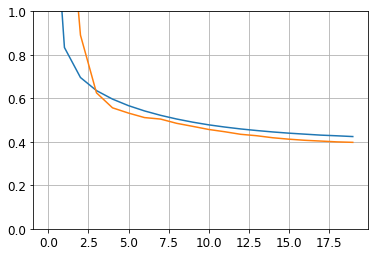

In [169]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting y-axis limit
plt.show()

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [172]:
import tensorflow as tf
from tensorflow import keras

In [186]:
keras.backend.clear_session() # clearing session
np.random.seed(42)
tf.random.set_seed(42)

In [187]:
X_train.shape

(11610, 8)

In [188]:
# Defining the layers

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2]) # concatenate inputs
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [189]:
model.summary() # generating model summary

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [190]:
(8+1)*30 + (30+1)*30 + (38+1)*1

1239

In [191]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3)) # compile model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid)) # fit model


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 130us/sample - loss: 1.2474 - val_loss: 0.8727
Epoch 2/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6341 - val_loss: 0.8881
Epoch 3/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5885 - val_loss: 0.5573
Epoch 4/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.5599 - val_loss: 0.5238
Epoch 5/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5367 - val_loss: 0.6201
Epoch 6/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5170 - val_loss: 0.4979
Epoch 7/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5022 - val_loss: 0.5240
Epoch 8/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4885 - val_loss: 0.4538
Epoch 9/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4778 - val_

In [192]:
mse_test = model.evaluate(X_test, y_test) # evaluate model

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

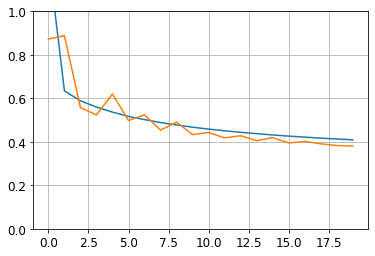

In [193]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting y-axis limit
plt.show()

In [197]:
y_pred = model.predict(X_test) # predict using the model

In [198]:
y_pred

array([[0.4686318],
       [1.856917 ],
       [3.340374 ],
       ...,
       [1.3357568],
       [2.1774392],
       [3.8641496]], dtype=float32)

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [199]:
# creating the model using different number of layers

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # concatenate inputs
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [202]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
____________________________________________________________________________________________

In [204]:
keras.utils.plot_model(model, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [24]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # compile the model

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[1.442],
       [1.687],
       [1.621],
       ...,
       [0.68 ],
       [0.613],
       [1.97 ]])]...

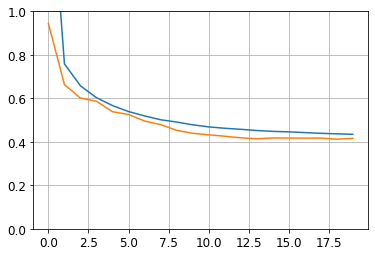

In [207]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting y-axis limit
plt.show()

In [209]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[0.31858593],
       [1.900069  ],
       [3.4027271 ]], dtype=float32)

In [210]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

Adding an auxiliary output for regularization:

In [212]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # concatenate the inputs
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) # aux output for regularization
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

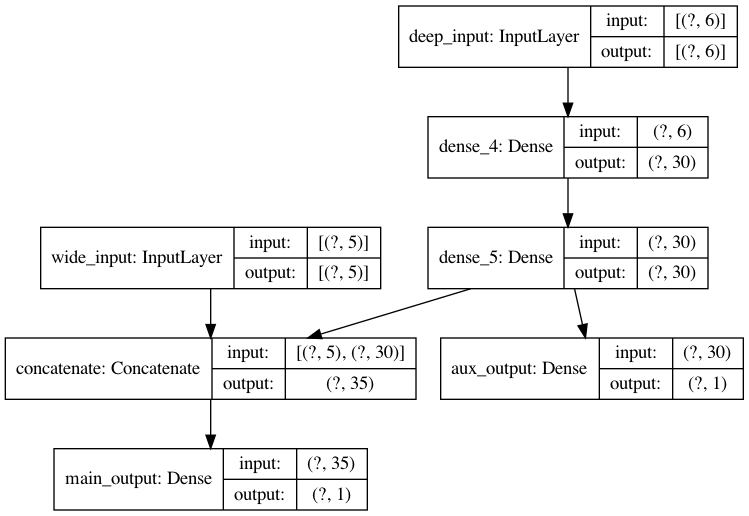

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [218]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3)) # compile the model
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])) # fit the model

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 183us/sample - loss: 0.5005 - main_output_loss: 0.4517 - aux_output_loss: 0.9385 - val_loss: 0.4783 - val_main_output_loss: 0.4175 - val_aux_output_loss: 1.0239
Epoch 2/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4960 - main_output_loss: 0.4487 - aux_output_loss: 0.9225 - val_loss: 0.4676 - val_main_output_loss: 0.4108 - val_aux_output_loss: 0.9778
Epoch 3/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.4921 - main_output_loss: 0.4460 - aux_output_loss: 0.9069 - val_loss: 0.4684 - val_main_output_loss: 0.4134 - val_aux_output_loss: 0.9623
Epoch 4/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.4887 - main_output_loss: 0.4438 - aux_output_loss: 0.8911 - val_loss: 0.4580 - val_main_output_loss: 0.4063 - val_aux_output_loss: 0.9212
Epoch 5/20
11610/11610 [==============================] - 1s 87us/

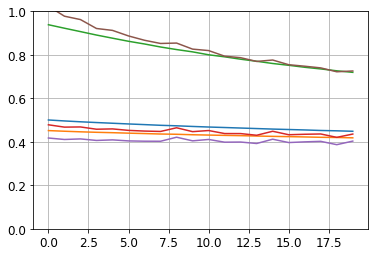

In [219]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting y-axis limit
plt.show()

In [220]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [223]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B]) # predicting using aux layer
y_pred_main

array([[0.2714687],
       [2.0636697],
       [3.4232175]], dtype=float32)

In [224]:
y_pred_aux

array([[0.77645755],
       [2.174656  ],
       [2.7845433 ]], dtype=float32)

# The subclassing API
When it makes sense to reuse models

In [29]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [30]:
# Creating the WideAndDeepModel using subclassing

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu") # creating an instance of the WideAndDeepModel

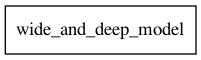

In [31]:
keras.utils.plot_model(model, show_shapes=True)

In [32]:
model.layers

In [33]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]


In [36]:
# Compiling, evaluating, and predicting the model

model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [37]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 170us/sample - loss: 2.1329 - output_1_loss: 1.9166 - output_2_loss: 4.0719 - val_loss: 2.2885 - val_output_1_loss: 1.5657 - val_output_2_loss: 8.7861
Epoch 2/10
11610/11610 [==============================] - 1s 82us/sample - loss: 0.8910 - output_1_loss: 0.6989 - output_2_loss: 2.6202 - val_loss: 1.4258 - val_output_1_loss: 0.6285 - val_output_2_loss: 8.5972
Epoch 3/10
11610/11610 [==============================] - 1s 85us/sample - loss: 0.7397 - output_1_loss: 0.6064 - output_2_loss: 1.9374 - val_loss: 1.3894 - val_output_1_loss: 0.5941 - val_output_2_loss: 8.5417
Epoch 4/10
11610/11610 [==============================] - 1s 81us/sample - loss: 0.6746 - output_1_loss: 0.5684 - output_2_loss: 1.6301 - val_loss: 1.3275 - val_output_1_loss: 0.6028 - val_output_2_loss: 7.8451
Epoch 5/10
11610/11610 [==============================] - 1s 81us/sample - loss: 0.6363 - output_1_loss: 0

In [38]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

NameError: name 'X_new_A' is not defined

# Saving and Restoring

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
# creating a model to demonstrate saving and restoring

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


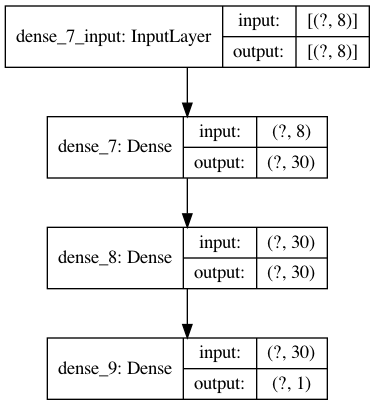

In [46]:
keras.utils.plot_model(model, show_shapes=True)

In [47]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # compile the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) # fit the model
mse_test = model.evaluate(X_test, y_test) # evalutate the model

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 106us/sample - loss: 1.8373 - val_loss: 2.8236
Epoch 2/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.7880 - val_loss: 0.7494
Epoch 3/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6797 - val_loss: 0.6271
Epoch 4/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.6262 - val_loss: 0.5998
Epoch 5/10
11610/11610 [==============================] - 1s 85us/sample - loss: 0.5843 - val_loss: 0.5389
Epoch 6/10
11610/11610 [==============================] - 1s 94us/sample - loss: 0.5489 - val_loss: 0.5217
Epoch 7/10
11610/11610 [==============================] - 1s 94us/sample - loss: 0.5206 - val_loss: 0.4847
Epoch 8/10
11610/11610 [==============================] - 1s 82us/sample - loss: 0.4984 - val_loss: 0.4595
Epoch 9/10
11610/11610 [==============================] - 1s 89us/sample - loss: 0.4797 - val_

In [48]:
model.save("my_keras_model.h5") # Saving the model

In [50]:
!cat my_keras_model.h5



                    ��������[      ��������        `              �       �                               h      TREE   ����������������                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      HEAP    X       0       �              model_weights   optimizer_weights              (                                     �       �       H        keras_version                                         @        backend                         
   model_config                     

In [52]:
# by getting only the strings we can collect some info
!strings my_keras_model.h5

TREE
HEAP
model_weights
optimizer_weights
keras_version
backend
model_config
training_config
TREE
HEAP
dense_7
dense_8
dense_9
layer_names
dense_7dense_8dense_9
GCOL
2.2.4-tf
tensorflow
{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "batch_input_shape": [null, 8], "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_8", "trainable": true, "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}

In [54]:
model1 = keras.models.load_model("my_keras_model.h5") # Loading the model

In [57]:
X_new = X_test[:3]
model.predict(X_new) # predicting using the model

array([[0.81090605],
       [1.5668125 ],
       [3.0257158 ]], dtype=float32)

In [58]:
model1.predict(X_new)

array([[0.81090605],
       [1.5668125 ],
       [3.0257158 ]], dtype=float32)

In [59]:
model.save_weights("my_keras_weights.ckpt") # saving the weights

In [61]:
model.load_weights("my_keras_weights.ckpt") # loading the saved weights

# Using Callbacks during Training

In [75]:
# Clearing previous session and
# generating random seed and setting
# the random seed

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
# Defining the model to demostrate callbacks

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) # saving the best model checkpoint
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb]) # using the callback
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 115us/sample - loss: 1.8373 - val_loss: 2.8236
Epoch 2/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.7880 - val_loss: 0.7494
Epoch 3/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.6797 - val_loss: 0.6271
Epoch 4/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6262 - val_loss: 0.5998
Epoch 5/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5843 - val_loss: 0.5389
Epoch 6/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5489 - val_loss: 0.5217
Epoch 7/10
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5206 - val_loss: 0.4847
Epoch 8/10
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4984 - val_loss: 0.4595
Epoch 9/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4797 - val_

In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True) # saving early stopping
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # using the callback for checkpoint, and early stopping
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 107us/sample - loss: 0.3925 - val_loss: 0.4214
Epoch 2/100
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3906 - val_loss: 0.3912
Epoch 3/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3885 - val_loss: 0.3947
Epoch 4/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3867 - val_loss: 0.3955
Epoch 5/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3851 - val_loss: 0.3790
Epoch 6/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3831 - val_loss: 0.4056
Epoch 7/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3815 - val_loss: 0.3825
Epoch 8/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3801 - val_loss: 0.4186
Epoch 9/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.37

In [78]:
mse_test = model.evaluate(X_valid, y_valid)

3870/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [86]:
# Creating custom callback

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\n SG :: val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [87]:
val_train_ratio_cb = PrintValTrainRatioCallback() # calling the custom callback
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb]) # fitting the model using the custom callback

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11136/11610 [===========================>..] - ETA: 0s - loss: 0.3642
 SG :: val/train: 1.07
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3658 - val_loss: 0.3904
Epoch 2/5
10976/11610 [===========================>..] - ETA: 0s - loss: 0.3656
 SG :: val/train: 0.99
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3652 - val_loss: 0.3609
Epoch 3/5
11552/11610 [============================>.] - ETA: 0s - loss: 0.3642
 SG :: val/train: 1.00
11610/11610 [==============================] - 1s 70us/sample - loss: 0.3643 - val_loss: 0.3645
Epoch 4/5
10944/11610 [===========================>..] - ETA: 0s - loss: 0.3658
 SG :: val/train: 1.01
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3636 - val_loss: 0.3675
Epoch 5/5
10656/11610 [==========================>...] - ETA: 0s - loss: 0.3654
 SG :: val/train: 0.98
11610/11610 [==============================] - 1s 56

In [89]:
# SG - Idempotent code
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

path = "my_keras_model.h5"
ck_file = "my_keras_model_ch_pt.h5"
if os.path.exists(path):
    model = keras.models.load_model(path) # Loading the model
    if os.path.exists(ck_file):
        model.load_weights(ck_file) # loading the saved weights
else:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # compile the model
    model.save("my_keras_model.h5") # Saving the model

checkpoint_cb = keras.callbacks.ModelCheckpoint(ck_file, save_best_only=True) # saving the best model checkpoint
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # saving early stopping

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # using the callback for checkpoint, and early stopping

mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 136us/sample - loss: 0.3760 - val_loss: 0.4048
Epoch 2/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3750 - val_loss: 0.3738
Epoch 3/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3737 - val_loss: 0.3784
Epoch 4/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3728 - val_loss: 0.3813
Epoch 5/100
11610/11610 [==============================] - 1s 91us/sample - loss: 0.3719 - val_loss: 0.3650
Epoch 6/100
11610/11610 [==============================] - 1s 106us/sample - loss: 0.3704 - val_loss: 0.3904
Epoch 7/100
11610/11610 [==============================] - 1s 112us/sample - loss: 0.3694 - val_loss: 0.3655
Epoch 8/100
11610/11610 [==============================] - 1s 101us/sample - loss: 0.3685 - val_loss: 0.4024
Epoch 9/100
11610/11610 [==============================] - 1s 106us/sample - loss: 